In [1]:
from keras.datasets import mnist
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np
from PIL import Image
dog1 = Image.open('./picture/dog1.jpg').convert('L')
#dog1 = dog1.resize((500, 500), Image.BILINEAR)
#dog1 = np.array(dog1)
dog2 = Image.open('./picture/dog2.jpeg').convert('L')
#dog2 = dog2.resize((500, 500), Image.BILINEAR)
#dog2 = np.array(dog2)
sofa = Image.open('./picture/sofa.png').convert('L')
#sofa = sofa.resize((500, 500), Image.BILINEAR)
#sofa = np.array(sofa)
table = Image.open('./picture/table.jpg').convert('L')
#table = table.resize((500, 500), Image.BILINEAR)
#table = np.array(table)

In [29]:
def pre_process(pic, w, h):
    pic = pic.resize((w, h), Image.BILINEAR)
    pic = np.array(pic)
    pic = pic.astype('float32') / 255.
    pic = pic.reshape(np.prod(pic.shape[:]))
    return pic

In [30]:
w = 28
h = 28
dog1 = pre_process(dog1, w, h)
dog2 = pre_process(dog2, w, h)
sofa = pre_process(sofa, w, h)
table = pre_process(table, w, h)

In [31]:
print(dog1.shape, dog2.shape, sofa.shape, table.shape)

(784,) (784,) (784,) (784,)


In [32]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape) 
print(x_test.shape) 

(60000, 784)
(10000, 784)


In [33]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [34]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [35]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [36]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [37]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [38]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.3757 - val_loss: 0.2707
Epoch 2/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.2627 - val_loss: 0.2511
Epoch 3/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2402 - val_loss: 0.2273
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.2186 - val_loss: 0.2083
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.2029 - val_loss: 0.1954
Epoch 6/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.1922 - val_loss: 0.1864
Epoch 7/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1840 - val_loss: 0.1789
Epoch 8/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1772 - val_loss: 0.1727
Epoch 9/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.1713 - val_loss: 0.1

In [39]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

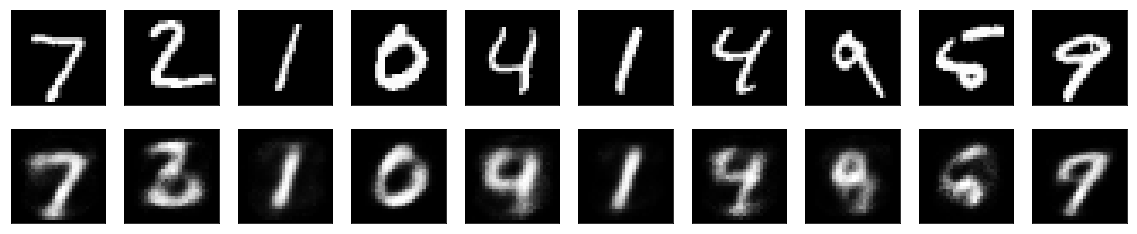

In [40]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [47]:
def process(pic):
    pic = pic.reshape(1, pic.shape[0])
    encoded_pic = encoder.predict(pic)
    decoded_pic = decoder.predict(encoded_pic)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(pic.reshape(28, 28))
    plt.gray()
    plt.subplot(1,2,2)
    plt.imshow(decoded_pic.reshape(28, 28))
    plt.gray()
    plt.show()

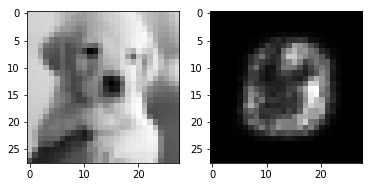

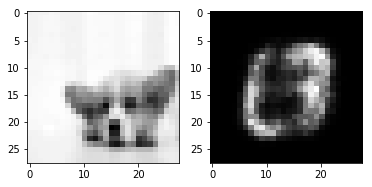

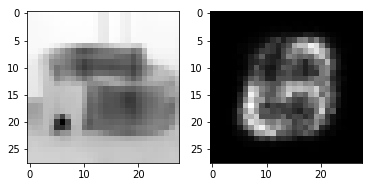

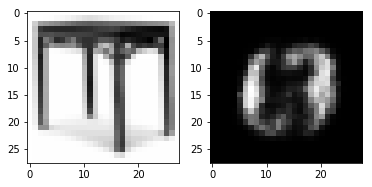

In [49]:
process(dog1)
process(dog2)
process(sofa)
process(table)